In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
trades = pd.read_csv("/historical_data.csv")

In [40]:
sentiment = pd.read_csv("/fear_greed_index.csv")

In [41]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [42]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [43]:
trades.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [45]:
trades.shape

(211224, 16)

In [46]:
sentiment.shape

(2644, 4)

In [47]:
trades.dtypes

,0
Account,object
Coin,object
Execution Price,float64
Size Tokens,float64
Size USD,float64
Side,object
Timestamp IST,object
Start Position,float64
Direction,object
Closed PnL,float64


In [51]:
sentiment.dtypes

,0
timestamp,int64
value,int64
classification,object
date,object


In [52]:
trades.isnull().sum()


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [53]:
sentiment.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [59]:
trades.duplicated().sum()

np.int64(0)

In [62]:
sentiment.duplicated().sum()

np.int64(0)

In [65]:
trades['trade_time'] = pd.to_datetime(
    trades['Timestamp IST'],
    format='%d-%m-%Y %H:%M'
)

In [66]:
sentiment['sentiment_date'] = pd.to_datetime(sentiment['date'])

In [67]:
trades['trade_time'].head()

,trade_time
0,2024-12-02 22:50:00
1,2024-12-02 22:50:00
2,2024-12-02 22:50:00
3,2024-12-02 22:50:00
4,2024-12-02 22:50:00


In [68]:
sentiment['sentiment_date'].head()

,sentiment_date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05


In [69]:
trades['trade_date'] = trades['trade_time'].dt.date
sentiment['sentiment_date'] = sentiment['sentiment_date'].dt.date

In [70]:
merged = pd.merge(
    trades,
    sentiment,
    left_on='trade_date',
    right_on='sentiment_date',
    how='inner'
)

In [71]:
merged.shape

(211218, 23)

In [72]:
merged['classification'].value_counts()

,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


In [73]:
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Fee,Trade ID,Timestamp,trade_time,trade_date,timestamp,value,classification,date,sentiment_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1733117400,80,Extreme Greed,2024-12-02,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1733117400,80,Extreme Greed,2024-12-02,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1733117400,80,Extreme Greed,2024-12-02,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1733117400,80,Extreme Greed,2024-12-02,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1733117400,80,Extreme Greed,2024-12-02,2024-12-02


In [78]:
merged = merged.drop(columns=['sentiment_date'])

In [79]:
merged[['trade_date', 'classification']].head()

,trade_date,classification
0,2024-12-02,Extreme Greed
1,2024-12-02,Extreme Greed
2,2024-12-02,Extreme Greed
3,2024-12-02,Extreme Greed
4,2024-12-02,Extreme Greed


In [80]:
merged['profit_label'] = merged['Closed PnL'].apply(
    lambda x: 'Profit' if x > 0 else 'Loss'
)

In [86]:
merged[['Closed PnL', 'profit_label']].head()

,Closed PnL,profit_label
0,0.0,Loss
1,0.0,Loss
2,0.0,Loss
3,0.0,Loss
4,0.0,Loss


In [88]:
merged['profit_label'].value_counts()

,count
profit_label,
Loss,124355
Profit,86863


In [90]:
merged['abs_pnl'] = merged['Closed PnL'].abs()

In [92]:
merged[['Closed PnL', 'abs_pnl']].tail()

,Closed PnL,abs_pnl
211213,-20.2566,20.2566
211214,-112.5773,112.5773
211215,-22.4402,22.4402
211216,-190.7894,190.7894
211217,-53.9063,53.9063


In [94]:
merged.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'trade_time', 'trade_date', 'timestamp', 'value',
       'classification', 'date', 'profit_label', 'abs_pnl'],
      dtype='object')

In [95]:
merged['trade_volume_usd'] = merged['Size USD']

In [96]:
merged[['Size USD', 'trade_volume_usd']].head()

,Size USD,trade_volume_usd
0,7872.16,7872.16
1,127.68,127.68
2,1150.63,1150.63
3,1142.04,1142.04
4,69.75,69.75


In [97]:
merged['is_buy'] = merged['Side'].str.upper() == 'BUY'

In [100]:
merged[['Side', 'is_buy']].head()

,Side,is_buy
0,BUY,True
1,BUY,True
2,BUY,True
3,BUY,True
4,BUY,True


In [102]:
cols_to_drop = [
    'sentiment_date',
    'date',
    'timestamp',
    'Timestamp',
    'trade_time',
    'value'
]

merged = merged.drop(columns=[c for c in cols_to_drop if c in merged.columns])

In [103]:
avg_pnl_by_sentiment = merged.groupby('classification')['Closed PnL'].mean()
avg_pnl_by_sentiment


,Closed PnL
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


In [105]:
pnl_distribution = merged.groupby(
    ['classification', 'profit_label']
).size().reset_index(name='count')

pnl_distribution

,classification,profit_label,count
0,Extreme Fear,Loss,13469
1,Extreme Fear,Profit,7931
2,Extreme Greed,Loss,21398
3,Extreme Greed,Profit,18594
4,Fear,Loss,35818
5,Fear,Profit,26019
6,Greed,Loss,30945
7,Greed,Profit,19358
8,Neutral,Loss,22725
9,Neutral,Profit,14961


In [106]:
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,trade_date,classification,profit_label,abs_pnl,trade_volume_usd,is_buy
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,2024-12-02,Extreme Greed,Loss,0.0,7872.16,True
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,2024-12-02,Extreme Greed,Loss,0.0,127.68,True
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,2024-12-02,Extreme Greed,Loss,0.0,1150.63,True
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,2024-12-02,Extreme Greed,Loss,0.0,1142.04,True
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,2024-12-02,Extreme Greed,Loss,0.0,69.75,True


In [108]:
import os

os.makedirs('csv_files', exist_ok=True)
os.makedirs('outputs', exist_ok=True)


In [110]:
merged.to_csv('csv_files/clean_merged_trades_sentiment.csv', index=False)


In [111]:
merged.to_csv('csv_files/feature_engineered_trades.csv', index=False)


In [112]:
pnl_table = (
    merged.groupby(['classification', 'profit_label'])
      .size()
      .reset_index(name='count')
)

pnl_table.to_csv(
    'csv_files/sentiment_profitability_distribution.csv',
    index=False
)

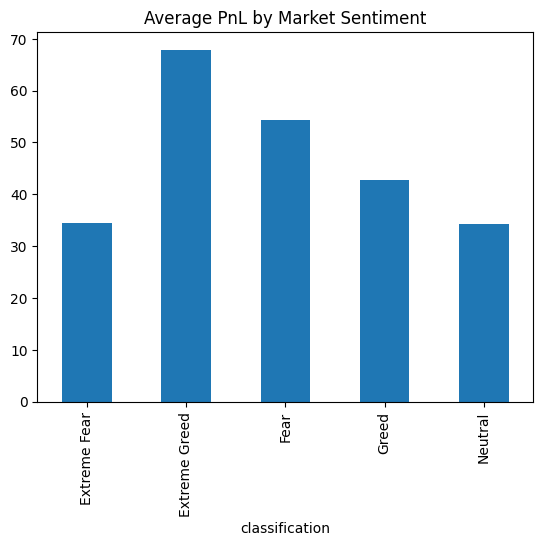

In [117]:
avg_pnl = merged.groupby('classification')['Closed PnL'].mean()

plt.figure()
avg_pnl.plot(kind='bar')
plt.title('Average PnL by Market Sentiment')
plt.savefig('outputs/avg_pnl_by_sentiment.png')
plt.show()
